Shape of Y_shifted: (2, 10000)
Shape of X: (2, 10000)
Shape of (np.diag(xC) @ np.ones((2,nPoints))): (2, 10000)
XC= [2 1]
sigma= [2.  0.5]
Rotation matrix= [[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]
U:
 [[-0.50297799  0.86429922]
 [ 0.86429922  0.50297799]]
S:
 [[2.00295699 0.        ]
 [0.         0.4993825 ]]
(2, 2) (2,) (2, 10000)


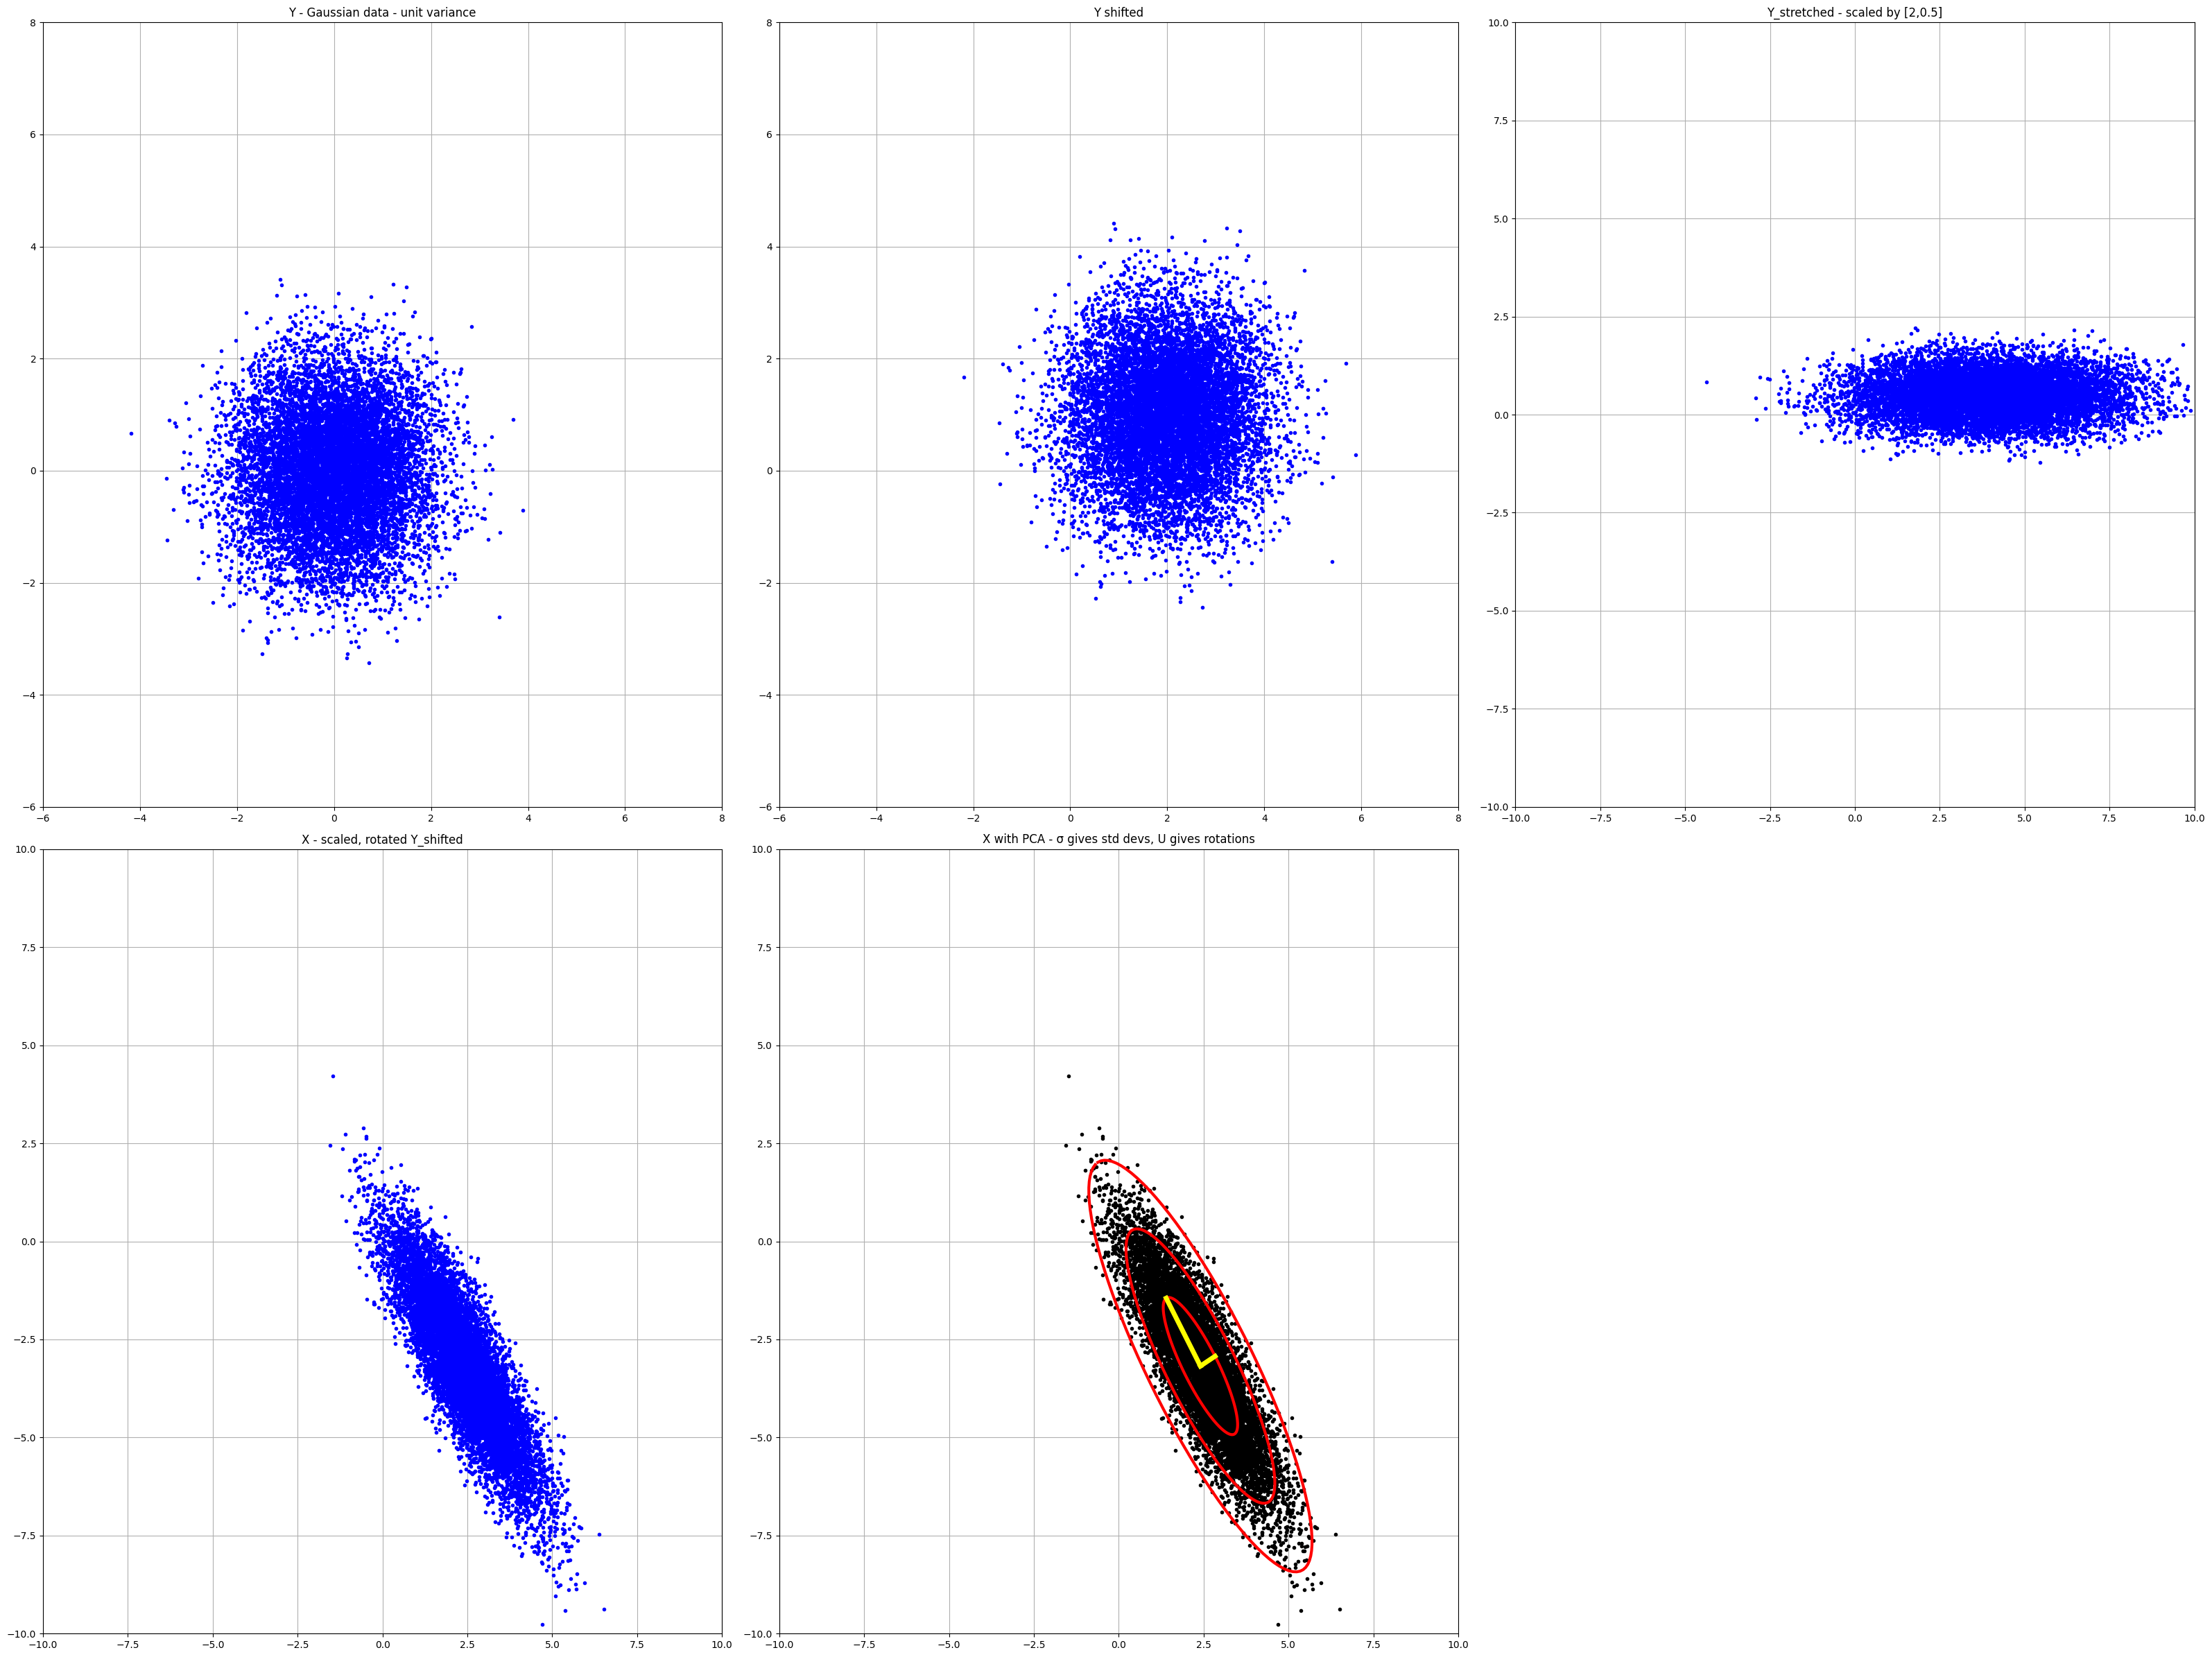

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [32, 24]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

# A different rotation matrix from the example in the book.
# A matrix is orthogonal if its transpose is also its inverse. i.e R.T @ R = I
# Determinant of an orthogonal matrix is either +1 or -1. 
# A unitary rotation matrix has determinant +1. but converse is not necessarily true.
# determinant has the physical interpretation of the area formed by the column vectors of the matrix.
R = np.array([[np.cos(theta), np.sin(theta)],
              [-np.sin(theta), np.cos(theta)]])


nPoints = 10000            # Create 10,000 points
Y = np.random.randn(2,nPoints)

Y_shifted = Y + (np.diag(xC) @ np.ones((2,nPoints)))

# Stretch data along principal axes
Y_stretched = np.diag(sig) @ Y_shifted

# Apply rotation of stretched data
X = R @ Y_stretched

print("Shape of Y_shifted:", Y_shifted.shape)
print("Shape of X:", X.shape)
print("Shape of (np.diag(xC) @ np.ones((2,nPoints))):", (np.diag(xC) @ np.ones((2,nPoints))).shape)

print( "XC=" , xC )
print("sigma=", sig)
print("Rotation matrix=", R)

# Create figure with 2 rows, 3 columns
fig = plt.figure()

# First row: Y (centered)
ax0 = fig.add_subplot(2, 3, 1)
ax0.plot(Y[0,:], Y[1,:], '.', color='blue')
ax0.set_title('Y - Gaussian data - unit variance')
ax0.grid()
ax0.set_xlim((-6, 8))
ax0.set_ylim((-6, 8))


ax1 = fig.add_subplot(2, 3, 2)
ax1.plot(Y_shifted[0,:], Y_shifted[1,:], '.', color='blue')
ax1.set_title('Y shifted')
ax1.grid()
ax1.set_xlim((-6, 8))
ax1.set_ylim((-6, 8))

# Second row: Y_stretched
ax2 = fig.add_subplot(2, 3, 3)
ax2.plot(Y_stretched[0,:], Y_stretched[1,:], '.', color='blue')
ax2.set_title('Y_stretched - scaled by [2,0.5]')
ax2.grid()
ax2.set_xlim((-10, 10))
ax2.set_ylim((-10, 10))

ax3 = fig.add_subplot(2, 3, 4)
ax3.plot(X[0,:], X[1,:], '.', color='blue')
ax3.set_title('X - scaled, rotated Y_shifted')
ax3.grid()
ax3.set_xlim((-10, 10))
ax3.set_ylim((-10, 10))

## f_ch01_ex03_1b - PCA Analysis

Xavg = np.mean(X, axis=1)                  # Compute mean
B = X - np.tile(Xavg, (nPoints, 1)).T      # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints), full_matrices=0)

print ("U:\n", U   )
print ("S:\n", np.diag(S) )
print ( np.shape(U), np.shape(S), np.shape(VT) )

ax4 = fig.add_subplot(2, 3, 5)
ax4.plot(X[0,:], X[1,:], '.', color='k')   # Plot data to overlay PCA
ax4.set_title('X with PCA - σ gives std devs, U gives rotations')
ax4.grid()
ax4.set_xlim((-10, 10))
ax4.set_ylim((-10, 10))

theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std, 2-std, 3-std confidence ellipses
Xstd = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax4.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:], '-', color='red', linewidth=3)
ax4.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:], '-', color='red', linewidth=3)
ax4.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:], '-', color='red', linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax4.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]), '-', color='yellow', linewidth=5)
ax4.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]), '-', color='yellow', linewidth=5)

plt.tight_layout()



plt.show()

 



Shape of X: (2, 10000) - Each of the 10000 columns is a separate 2D data point
The SVD/PCA analyzes the relationships between these data points and discovers the Orthogonal Basis (Principal components) and their loadings.
